In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [35]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>

In [4]:
data_file = "homeprices.applied.econ.csv"
homes = pd.read_csv(data_file)

<IPython.core.display.Javascript object>

In [5]:
homes.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,66000.0,3880,3,2,2,yes,no,yes,no,no,2,no
2,83800.0,4800,3,1,1,yes,yes,yes,no,no,0,no
3,45000.0,3986,2,2,1,no,yes,yes,no,no,1,no
4,65900.0,4510,4,2,2,yes,no,yes,no,no,0,no


<IPython.core.display.Javascript object>

In [6]:
ac = homes[(homes["airco"] == "yes")]
ac.info()
no_ac = homes[(homes["airco"] == "no")]
no_ac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 373 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     173 non-null    float64
 1   lotsize   173 non-null    int64  
 2   bedrooms  173 non-null    int64  
 3   bathrms   173 non-null    int64  
 4   stories   173 non-null    int64  
 5   driveway  173 non-null    object 
 6   recroom   173 non-null    object 
 7   fullbase  173 non-null    object 
 8   gashw     173 non-null    object 
 9   airco     173 non-null    object 
 10  garagepl  173 non-null    int64  
 11  prefarea  173 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 17.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     373 non-null    float64
 1   lotsize   373 non-null    int64  
 2   bedrooms  373 non-

<IPython.core.display.Javascript object>

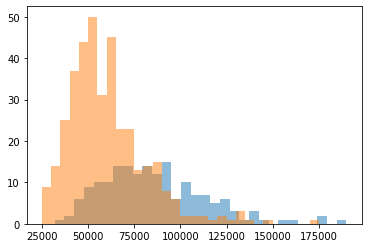

<IPython.core.display.Javascript object>

In [12]:
# Are the price distributions normal?

plt.hist(ac["price"], alpha=0.5, bins=30)
plt.hist(no_ac["price"], alpha=0.5, bins=30)

plt.show()

#probably worth getting rid of higher end

In [10]:
print(stats.describe(ac["price"]))
print(stats.describe(no_ac["price"]))

DescribeResult(nobs=173, minmax=(31900.0, 190000.0), mean=85880.58959537573, variance=810167352.2317516, skewness=0.8558523643779228, kurtosis=0.9609338749117713)
DescribeResult(nobs=373, minmax=(25000.0, 175000.0), mean=59884.85254691689, variance=455341800.98626363, skewness=1.4196100209360347, kurtosis=3.448225770991252)


<IPython.core.display.Javascript object>

In [20]:
ac_price_filter = ac[ac["price"] < 160000]
no_ac_price_filter = no_ac[no_ac["price"] < 160000]

<IPython.core.display.Javascript object>

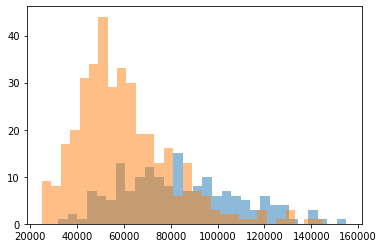

<IPython.core.display.Javascript object>

In [21]:

plt.hist(ac_price_filter["price"], alpha=0.5, bins=30)
plt.hist(no_ac_price_filter["price"], alpha=0.5, bins=30)

plt.show()


In [22]:
print(stats.describe(ac_price_filter["price"]))
print(stats.describe(no_ac_price_filter["price"]))

DescribeResult(nobs=169, minmax=(31900.0, 155000.0), mean=83756.46153846153, variance=630966344.0952381, skewness=0.4033131851867283, kurtosis=-0.3956088843504326)
DescribeResult(nobs=372, minmax=(25000.0, 145000.0), mean=59575.403225806454, variance=420754799.1631162, skewness=1.1707877321111237, kurtosis=1.9608867111564114)


<IPython.core.display.Javascript object>

In [23]:
stats.ttest_ind(ac_price_filter["price"], no_ac_price_filter["price"])

Ttest_indResult(statistic=11.820896027267267, pvalue=7.875909563277914e-29)

<IPython.core.display.Javascript object>

In [24]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt(
        (sample_1_var / sample_1_n) + (sample_2_var / sample_2_n)
    )
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return (
        "The difference in means at the 95% confidence interval (two-tail) is between "
        + str(ci_lower)
        + " and "
        + str(ci_upper)
        + "."
    )


get_95_ci(ac_price_filter["price"], no_ac_price_filter["price"])

'The difference in means at the 95% confidence interval (two-tail) is between -28503.998140727883 and -19858.11848458227.'

<IPython.core.display.Javascript object>

In [25]:
fb = homes[(homes["fullbase"] == "yes")]
fb.info()
no_fb = homes[(homes["fullbase"] == "no")]
no_fb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 438
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     191 non-null    float64
 1   lotsize   191 non-null    int64  
 2   bedrooms  191 non-null    int64  
 3   bathrms   191 non-null    int64  
 4   stories   191 non-null    int64  
 5   driveway  191 non-null    object 
 6   recroom   191 non-null    object 
 7   fullbase  191 non-null    object 
 8   gashw     191 non-null    object 
 9   airco     191 non-null    object 
 10  garagepl  191 non-null    int64  
 11  prefarea  191 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 19.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 125 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     355 non-null    float64
 1   lotsize   355 non-null    int64  
 2   bedrooms  355 non-

<IPython.core.display.Javascript object>

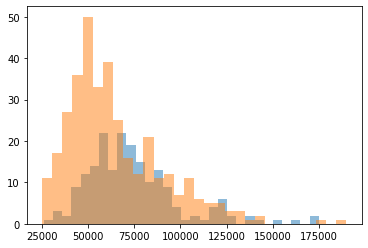

<IPython.core.display.Javascript object>

In [26]:
# Are the price distributions normal?

plt.hist(fb["price"], alpha=0.5, bins=30)
plt.hist(no_fb["price"], alpha=0.5, bins=30)

plt.show()

# probably worth getting rid of higher end

In [27]:
fb_filter = ac[ac["price"] < 160000]
no_fb_filter = no_ac[no_ac["price"] < 160000]

<IPython.core.display.Javascript object>

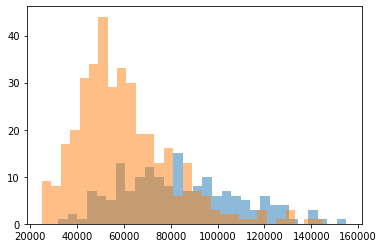

<IPython.core.display.Javascript object>

In [28]:
plt.hist(fb_filter["price"], alpha=0.5, bins=30)
plt.hist(no_fb_filter["price"], alpha=0.5, bins=30)

plt.show()

In [29]:
print(stats.describe(fb_filter["price"]))
print(stats.describe(no_fb_filter["price"]))

DescribeResult(nobs=169, minmax=(31900.0, 155000.0), mean=83756.46153846153, variance=630966344.0952381, skewness=0.4033131851867283, kurtosis=-0.3956088843504326)
DescribeResult(nobs=372, minmax=(25000.0, 145000.0), mean=59575.403225806454, variance=420754799.1631162, skewness=1.1707877321111237, kurtosis=1.9608867111564114)


<IPython.core.display.Javascript object>

In [30]:
stats.ttest_ind(fb_filter["price"], no_fb_filter["price"]) #p<0.001

Ttest_indResult(statistic=11.820896027267267, pvalue=7.875909563277914e-29)

<IPython.core.display.Javascript object>

In [31]:
get_95_ci(fb_filter["price"], no_fb_filter["price"])

'The difference in means at the 95% confidence interval (two-tail) is between -28503.998140727883 and -19858.11848458227.'

<IPython.core.display.Javascript object>

[[Text(0, 0, 'fb'), Text(0, 0, 'no_fb')]]

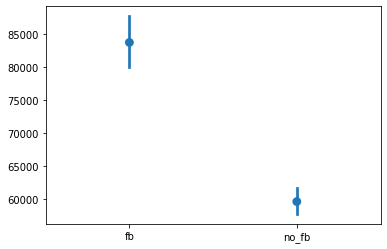

<IPython.core.display.Javascript object>

In [37]:
pplot = sns.pointplot(data=[fb_filter["price"], no_fb_filter["price"]], join=False)

pplot.set(xticklabels=["fb", "no_fb"])